In [1]:
%cd ..

/Users/Matteo/PycharmProjects/TrafficEmu


In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.subplot.bottom'] = 0.125
plt.rcParams['figure.edgecolor'] = 'white'

plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams["savefig.pad_inches"] = 0.1

plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

In [4]:
import pickle
import numpy as np
import emukit as ek
import GPy
import pandas as pd
import matplotlib.pyplot as plty

from emukit.model_wrappers import GPyModelWrapper
from emukit.core.initial_designs import RandomDesign
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement
from emukit.bayesian_optimization.loops import BayesianOptimizationLoop

from sumo_grid_simulation.grid_simulation import Simulator

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


In [5]:
simulator = Simulator(end_time=300)

In [9]:
def user_function(X):
    """  X = inputs - emukit doesnt pass named args, just an NxM ndarray, N is the number of points to evaluate, M is the number of parameters per each point """
    result = []
    i = 0
    
    for gridSize, edgeMaxSpeed, edgeLength, numLanes, accel in X:
        
        beta = 0.05
        max_number_of_vehicles = ((gridSize - 1) * gridSize * 2 + 4 * gridSize) * edgeLength / 5
        period = 300/(max_number_of_vehicles * beta)
        
        s = simulator.simulate(
            junctionType  = 2,
            tlType        = 2, 
            gridSize      = int(gridSize),
            edgeMaxSpeed  = edgeMaxSpeed,
            edgeLength    = edgeLength,
            numberOfLanes = int(numLanes),
            accel         = accel,
            trips_generator_period = period
        )
       
        result.append(s['timeLoss']/s['duration'])
        result.append(s['CO2'] / (max_number_of_vehicles * beta * s['duration']))
    
        i += 1
        
    
    return result  

In [10]:
optimal_point = np.array([8, 70, 1, 1.5]).reshape(1,-1)

In [17]:
timeLosses = []
emissions = []


for gridSize in range(9, 21):
    X = np.hstack([np.array([gridSize]).reshape(1,-1), optimal_point])
    y_time, y_emissions = user_function(X)
    
    timeLosses.append(y_time * 100)
    emissions.append(y_emissions)
    

 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds


In [10]:
optimal_point = np.array([8, 70, 1, 1.5]).reshape(1,-1)

In [17]:
timeLosses = []
emissions = []


for gridSize in range(9, 21):
    X = np.hstack([np.array([gridSize]).reshape(1,-1), optimal_point])
    y_time, y_emissions = user_function(X)
    
    timeLosses.append(y_time * 100)
    emissions.append(y_emissions)
    

 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds


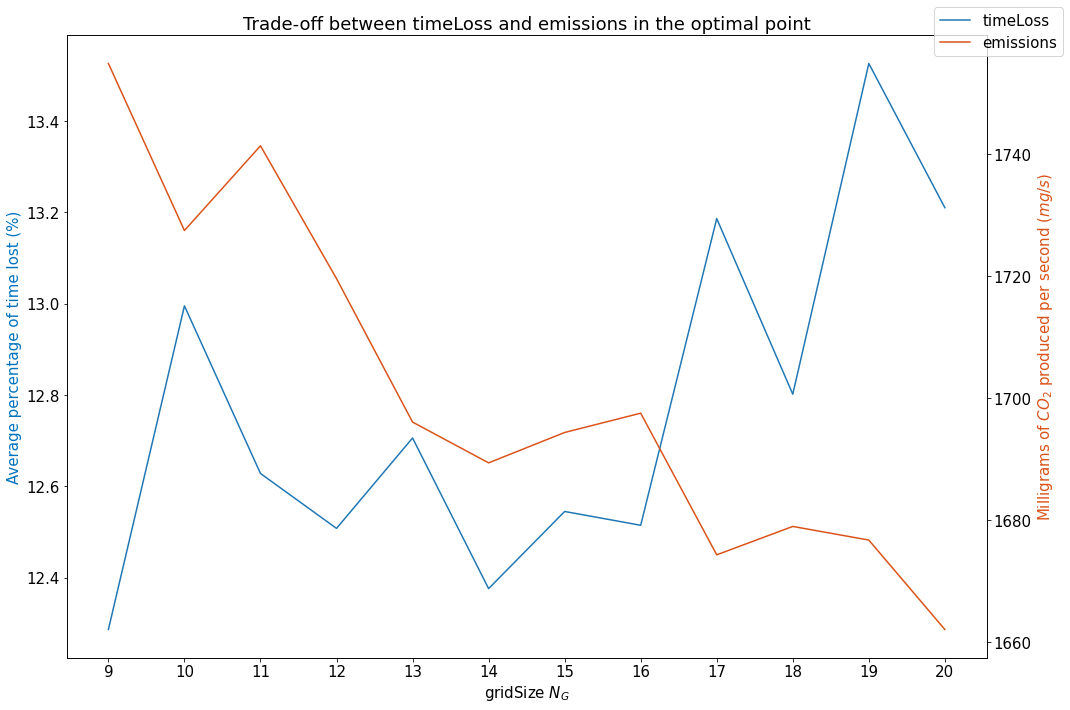

In [36]:
fig, ax = plt.subplots()

blue = [0, 0.4470, 0.7410]
orange = [0.8500, 0.3250, 0.0980]

ax.plot(np.arange(9,21,1), timeLosses)
ax.set_ylabel('Average percentage of time lost (%)', color=blue) 

ax2 = ax.twinx() 
ax2.plot(np.arange(9,21,1), emissions, color=orange)
ax2.set_ylabel('Milligrams of $CO_2$ produced per second ($mg/s$)', color=orange) 

ax.set_xlabel('gridSize $N_G$')
ax.set_title('Trade-off between timeLoss and emissions in the optimal point')
fig.legend(['timeLoss','emissions'])
plt.xticks(np.arange(9,21,1))
fig.tight_layout()  

fig.savefig('trade-off.png')

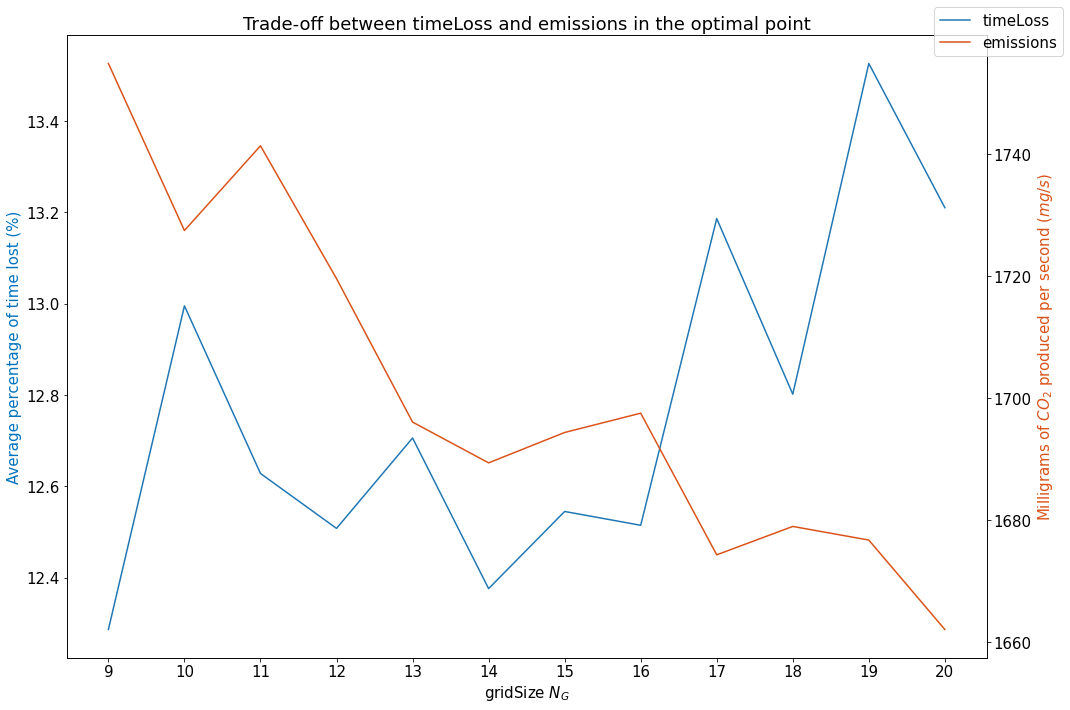

In [36]:
fig, ax = plt.subplots()

blue = [0, 0.4470, 0.7410]
orange = [0.8500, 0.3250, 0.0980]

ax.plot(np.arange(9,21,1), timeLosses)
ax.set_ylabel('Average percentage of time lost (%)', color=blue) 

ax2 = ax.twinx() 
ax2.plot(np.arange(9,21,1), emissions, color=orange)
ax2.set_ylabel('Milligrams of $CO_2$ produced per second ($mg/s$)', color=orange) 

ax.set_xlabel('gridSize $N_G$')
ax.set_title('Trade-off between timeLoss and emissions in the optimal point')
fig.legend(['timeLoss','emissions'])
plt.xticks(np.arange(9,21,1))
fig.tight_layout()  

fig.savefig('trade-off.png')